In [37]:
import pandas as pd

df = pd.read_csv('data-covid19.csv')
df['ds'] = pd.to_datetime(df.fecha)
df.tail()

,region,fecha,casos_acum,confirmados,total_cada_100mil,fallecidos_nuevos,fallecidos_acum,notificados_acum,ds
715,Ñuble,2020/04/12,613,7,119.831649,1,7,NaN,2020-04-12
716,Ñuble,2020/04/13,618,5,120.809069,0,7,NaN,2020-04-13
717,Ñuble,2020/04/14,622,4,121.591005,1,8,NaN,2020-04-14
718,Ñuble,2020/04/15,634,12,123.936812,0,8,NaN,2020-04-15
719,Ñuble,2020/04/16,639,5,124.914231,2,10,NaN,2020-04-16


In [38]:
# Proyectamos con nuevos casos

prophet_df = df.groupby('fecha').sum().rename(columns={'confirmados': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df.index)
prophet_df.tail()

,casos_acum,y,total_cada_100mil,fallecidos_nuevos,fallecidos_acum,notificados_acum,ds
fecha,,,,,,,
2020/04/12,7213,286,693.518284,7,80,0.0,2020-04-12
2020/04/13,7525,312,716.582169,2,82,0.0,2020-04-13
2020/04/14,7917,392,741.421377,10,92,0.0,2020-04-14
2020/04/15,8273,356,764.430886,2,94,0.0,2020-04-15
2020/04/16,8807,534,799.364679,11,105,0.0,2020-04-16


In [39]:
from fbprophet import Prophet

m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
# Python
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
70,2020-05-12
71,2020-05-13
72,2020-05-14
73,2020-05-15
74,2020-05-16


In [41]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
70,2020-05-12,765.127493,700.105440,836.087137
71,2020-05-13,784.837390,709.937820,847.878888
72,2020-05-14,823.107544,756.136191,890.153677
73,2020-05-15,846.649641,778.910025,913.896235
74,2020-05-16,847.160001,778.443479,914.961156


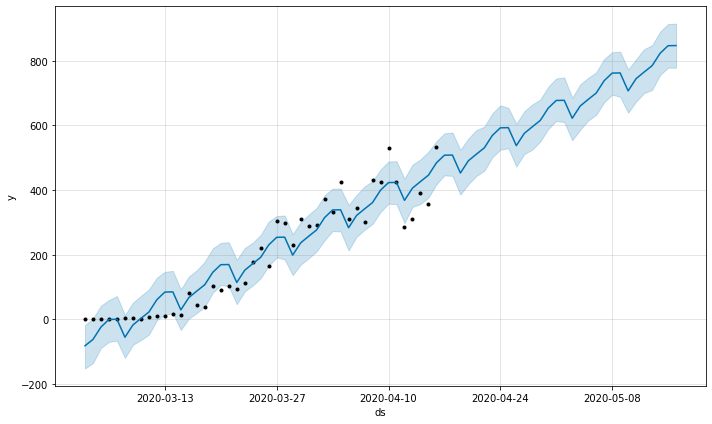

In [42]:
fig1 = m.plot(forecast)

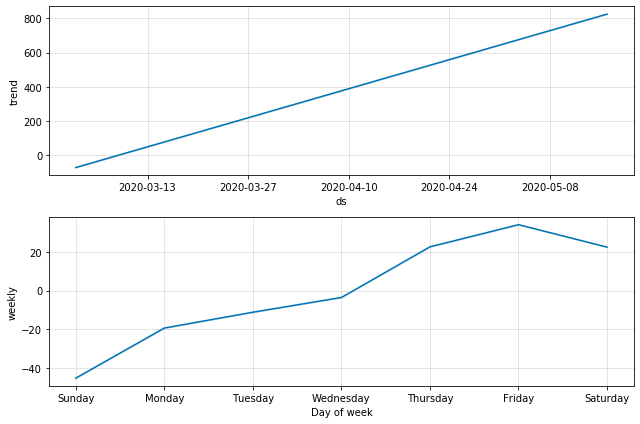

In [43]:
fig2 = m.plot_components(forecast)

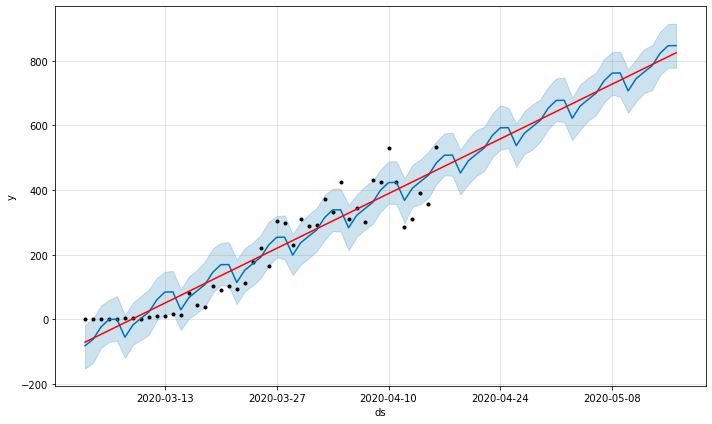

In [44]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)